In [41]:
import torch

from torch import nn
from torch.nn import functional as F
from torch import optim
from torchvision import datasets

import dlc_practical_prologue as prologue
import matplotlib.pyplot as plt
import numpy as np

# Get the dataset

In [42]:
train_input, train_target, test_input, test_target  = prologue.load_data(cifar=False, one_hot_labels=True,
                                                                         normalize=False, flatten=False)
print('train_input', train_input.size(), 'train_target', train_target.size())
print('test_input', test_input.size(), 'test_target', test_target.size())

* Using MNIST
** Reduce the data-set (use --full for the full thing)
** Use 1000 train and 1000 test samples
train_input torch.Size([1000, 1, 28, 28]) train_target torch.Size([1000, 10])
test_input torch.Size([1000, 1, 28, 28]) test_target torch.Size([1000, 10])


# Model

In [43]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*4*4*2, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.fc4 = nn.Linear(10, 2)
        self.MaxPool2d = nn.MaxPool2d(2, stride=2)
        
        
    def forward(self, x, y):
        x = self.MaxPool2d(F.relu(self.conv1(x)))
        x = self.MaxPool2d(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        y = self.MaxPool2d(F.relu(self.conv1(y)))
        y = self.MaxPool2d(F.relu(self.conv2(y)))
        y = y.view(y.size(0), -1)
        z = torch.cat((x,y), 1)
        z = self.fc1(z)
        z = self.fc2(z)
        z = self.fc3(z)
        z = self.fc4(z)
        return z

# Training

In [44]:
def compute_nb_errors(model, data_input, data_target):
    nb_data_errors = 0
    
    for b in range(1, train_input.size(0)-batch_size+1, batch_size):
        output = model(data_input.narrow(0, b, batch_size), data_input.narrow(0, b-1, batch_size))
        _, predicted_label = torch.max(output, 1)
        for k in range(batch_size):
            true_label = 1
            if data_target[b+k].argmax() > data_target[b+k-1].argmax():
                true_label = 0
            if predicted_label[k] != true_label:
                nb_data_errors = nb_data_errors + 1
    
    return nb_data_errors

In [63]:
batch_size = 50
eta = 0.01
epochs = 250
def train_model(model, train_input, train_target, test_input, test_target):
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=eta)
    
    for i in range(epochs):
        batch_1 = np.arange(1000)
        batch_2 = np.arange(1000)
        np.random.shuffle(batch_1)
        np.random.shuffle(batch_2)
        #for b in range(0, train_input.size(0), batch_size):
        #    for c in range(0, train_input.size(0), batch_size):
                #output = model(train_input.narrow(0, b, batch_size), train_input.narrow(0, c, batch_size))
        output = model(train_input[batch_1[:50]], train_input[batch_2[:50]])
        true_labels = torch.full((output.size(0),), 0)
        #        true_labels[train_target.narrow(0, b, batch_size).argmax(1) > train_target.narrow(0, c, batch_size).argmax(1)] = 1
        true_labels[train_target[batch_1[:50]].argmax(1) > train_target[batch_2[:50]].argmax(1)] = 1
        loss = criterion(output, true_labels.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
     
        if i%10 == 0:
            print(loss)   
            test_accuracy = compute_nb_errors(model, test_input, test_target)
            print("Epoch #", i, " test accuracy: ", test_accuracy/test_input.size(0))

In [64]:
net = Net()
train_model(net, train_input, train_target, test_input, test_target)

tensor(0.8792, grad_fn=<NllLossBackward>)
Epoch # 0  test accuracy:  0.529
tensor(0.6371, grad_fn=<NllLossBackward>)
Epoch # 10  test accuracy:  0.527
tensor(0.6684, grad_fn=<NllLossBackward>)
Epoch # 20  test accuracy:  0.577
tensor(0.6652, grad_fn=<NllLossBackward>)
Epoch # 30  test accuracy:  0.657
tensor(0.5933, grad_fn=<NllLossBackward>)
Epoch # 40  test accuracy:  0.705
tensor(0.4975, grad_fn=<NllLossBackward>)
Epoch # 50  test accuracy:  0.483
tensor(0.5180, grad_fn=<NllLossBackward>)
Epoch # 60  test accuracy:  0.733
tensor(0.4773, grad_fn=<NllLossBackward>)
Epoch # 70  test accuracy:  0.689
tensor(0.4769, grad_fn=<NllLossBackward>)
Epoch # 80  test accuracy:  0.757
tensor(0.4456, grad_fn=<NllLossBackward>)
Epoch # 90  test accuracy:  0.742
tensor(0.4505, grad_fn=<NllLossBackward>)
Epoch # 100  test accuracy:  0.754
tensor(0.3094, grad_fn=<NllLossBackward>)
Epoch # 110  test accuracy:  0.757
tensor(0.3875, grad_fn=<NllLossBackward>)
Epoch # 120  test accuracy:  0.773
tensor(0.4

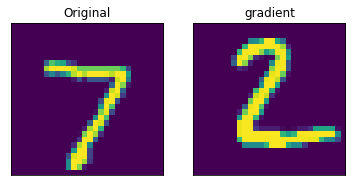

tensor(1)


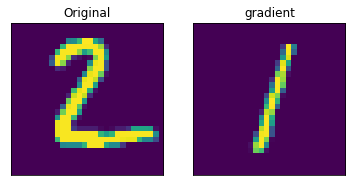

tensor(0)


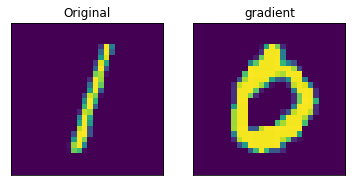

tensor(0)


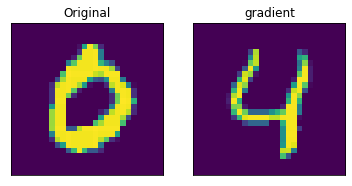

tensor(0)


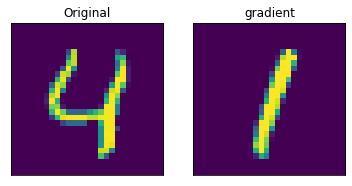

tensor(1)


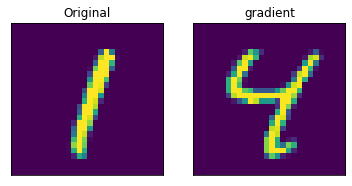

tensor(0)


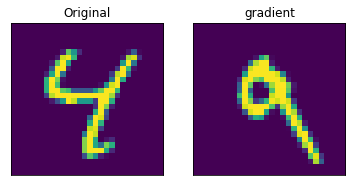

tensor(0)


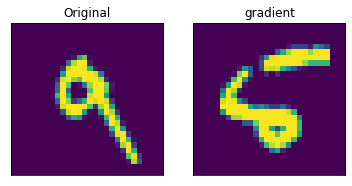

tensor(1)


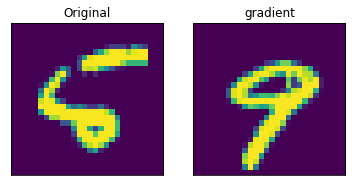

tensor(0)


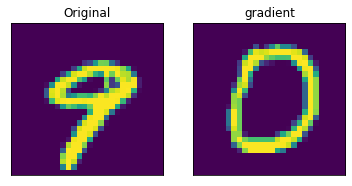

tensor(1)


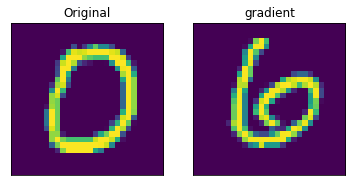

tensor(0)


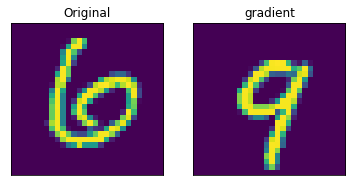

tensor(0)


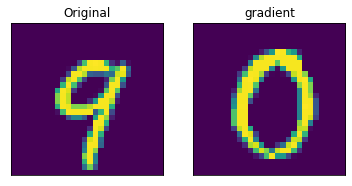

tensor(1)


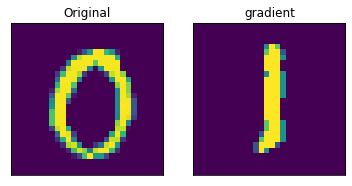

tensor(0)


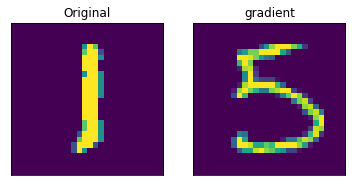

tensor(0)


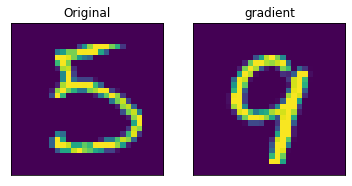

tensor(0)


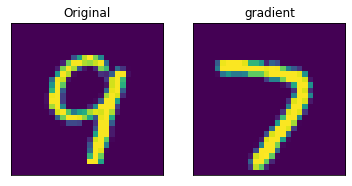

tensor(1)


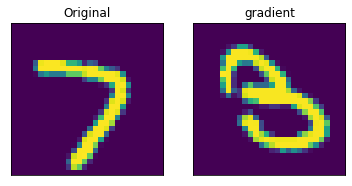

tensor(1)


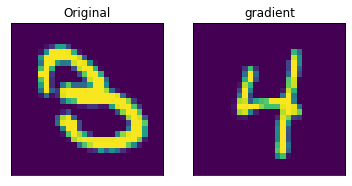

tensor(0)


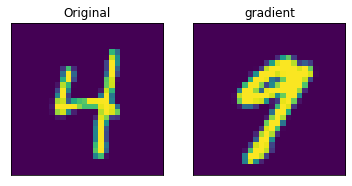

tensor(0)


In [59]:
res = net(test_input[0:20], test_input[1:21]).argmax(1)
for i in range(0, 20):
    plt.subplot(121),plt.imshow(test_input[i].view(28,28)),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(test_input[i+1].view(28,28)),plt.title('gradient')
    plt.xticks([]), plt.yticks([])
    plt.show()
    print(res[i])

In [40]:
arr = np.arange(1000)
np.random.shuffle(arr)
train_target[arr[:100]].argmax(1)

tensor([7, 1, 9, 1, 2, 9, 5, 7, 7, 9, 7, 0, 6, 8, 1, 3, 7, 5, 2, 7, 1, 5, 2, 7,
        0, 2, 4, 4, 2, 3, 9, 7, 1, 1, 5, 7, 1, 0, 0, 1, 5, 0, 3, 6, 7, 5, 2, 3,
        7, 6, 8, 6, 3, 2, 5, 1, 0, 7, 3, 9, 5, 3, 0, 3, 9, 6, 4, 5, 0, 4, 0, 9,
        0, 0, 0, 3, 1, 9, 7, 1, 8, 9, 8, 1, 5, 8, 4, 1, 4, 2, 9, 4, 8, 1, 8, 0,
        6, 6, 7, 5])